# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data manipulation

In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking Null Values

In [4]:
data["TotalCharges"] = (pd.to_numeric(data["TotalCharges"],errors="coerce"))
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Checking for Duplicate

In [5]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [6]:
data.dropna(inplace=True)
data.drop("customerID",axis="columns",inplace=True)

# Exploratory Data Analysis

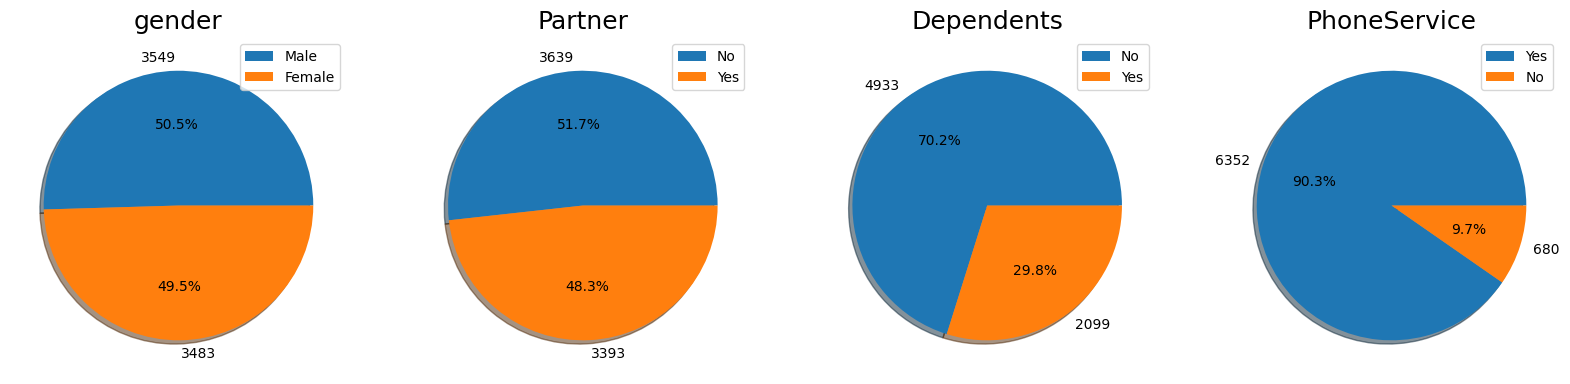

In [7]:
categ_columns = list(data.select_dtypes(include = ['object']).columns)

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="white")

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

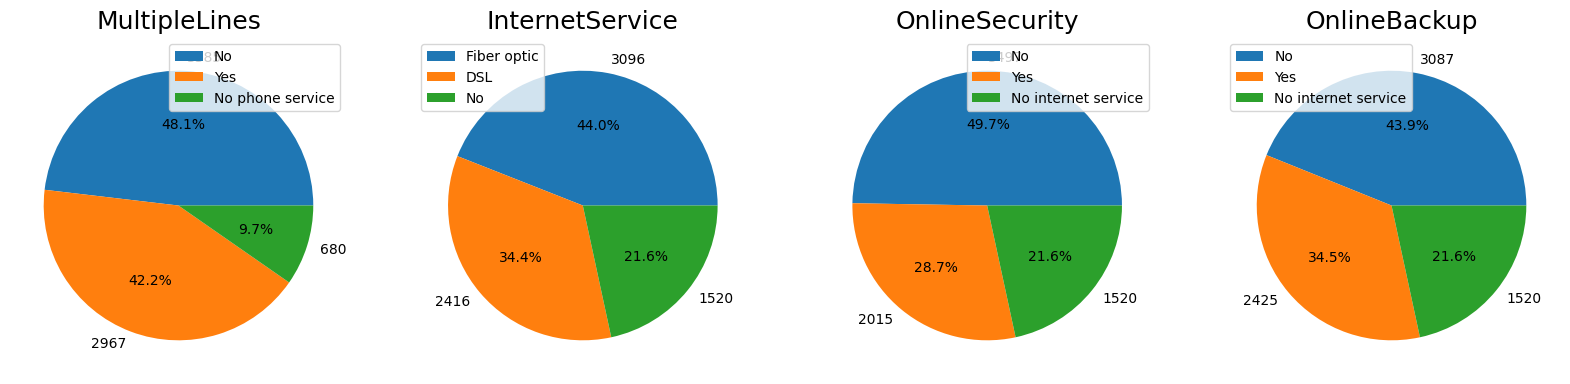

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="white")


for i, column in enumerate(categ_columns[4:8]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index,loc="best")

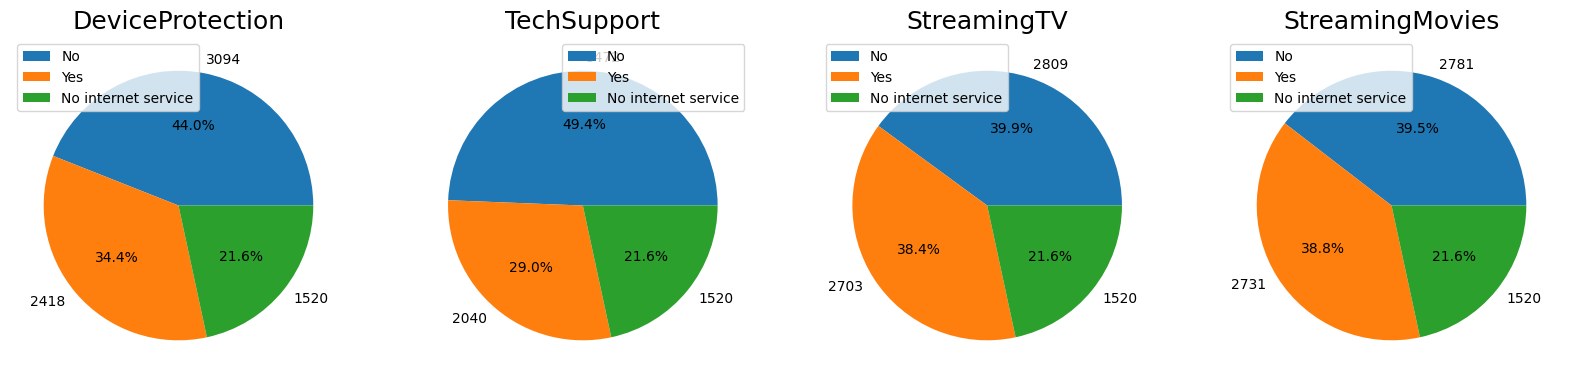

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="white")

for i, column in enumerate(categ_columns[8:12]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index)

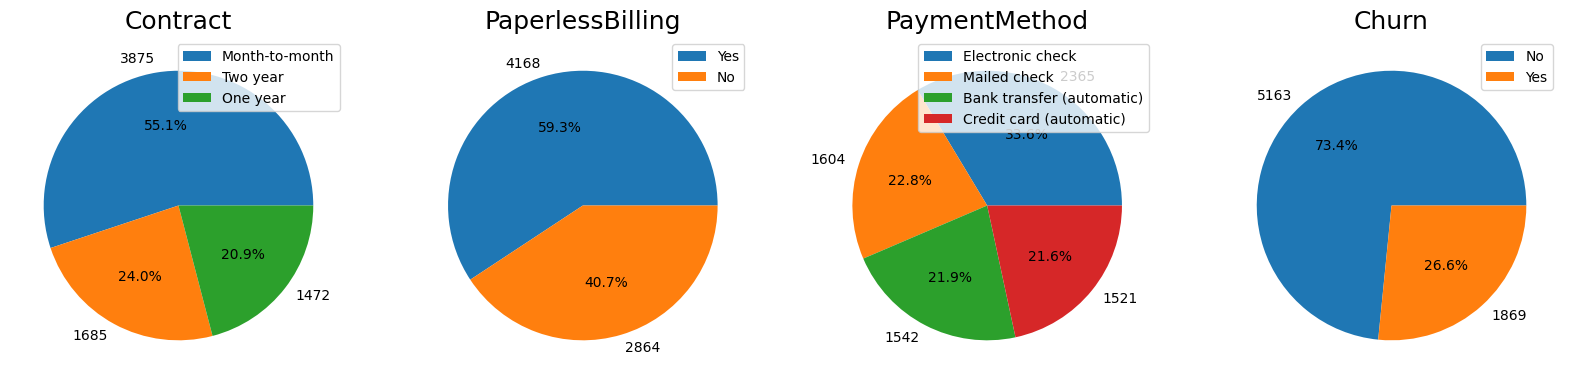

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="white")

for i, column in enumerate(categ_columns[12:]):

        ax = axes[i]
        d = data[column].value_counts()
        ax.pie(d, labels=d.values,autopct="%1.1f%%")
        ax.set_title(column,size=18)
        ax.legend(d.index)

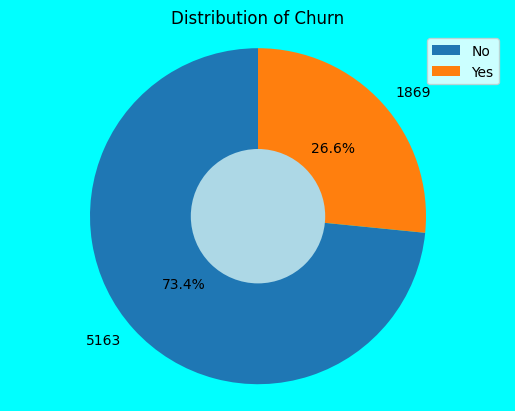

In [11]:
fig, ax = plt.subplots(facecolor="cyan")
d = data["Churn"].value_counts()
ax.pie(d,autopct='%1.1f%%', startangle=90,labels=d.values)
ax.legend(d.index)
ax.set_title("Distribution of Churn")
centre_circle = plt.Circle((0,0),0.4,fc='lightblue')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal');

[Text(0.5, 0, 'Count')]

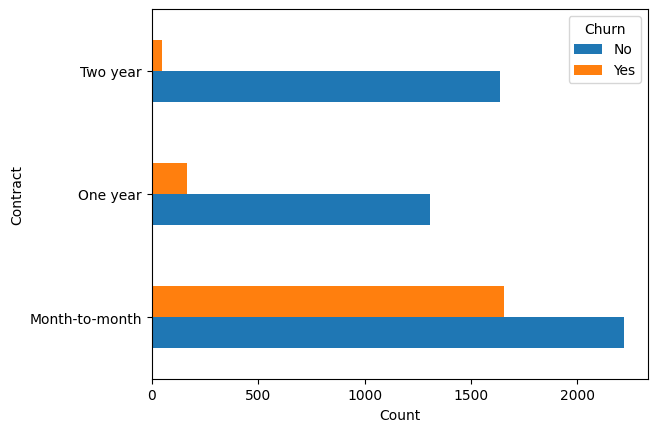

In [12]:
fig , ax = plt.subplots(facecolor="white")
pd.crosstab(data["Contract"],data["Churn"]).plot(kind="barh",ax=ax)
ax.set(xlabel="Count")

<Axes: xlabel='Churn', ylabel='tenure'>

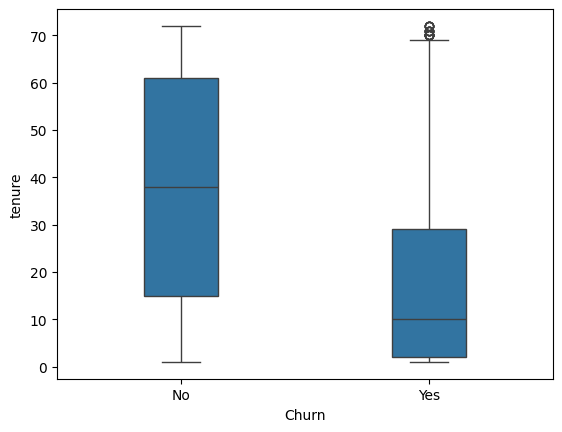

In [13]:
sns.boxplot(data=data,x="Churn",y="tenure",width=0.3)

[Text(0.5, 0, 'Count')]

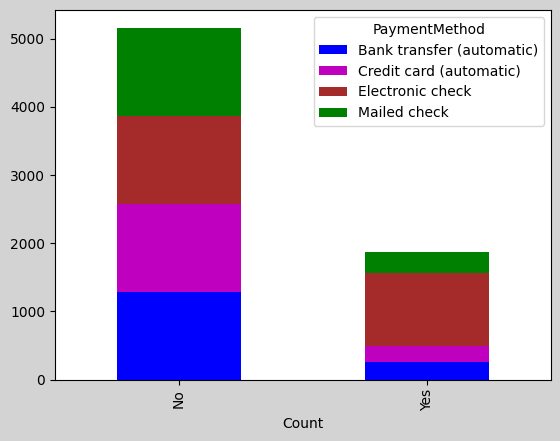

In [14]:
fig , ax = plt.subplots(facecolor="lightgray")
pd.crosstab(data["Churn"],data["PaymentMethod"]).plot(kind="bar",color=["b","m","brown","green"],ax=ax,stacked=True,)
ax.set(xlabel="Count")

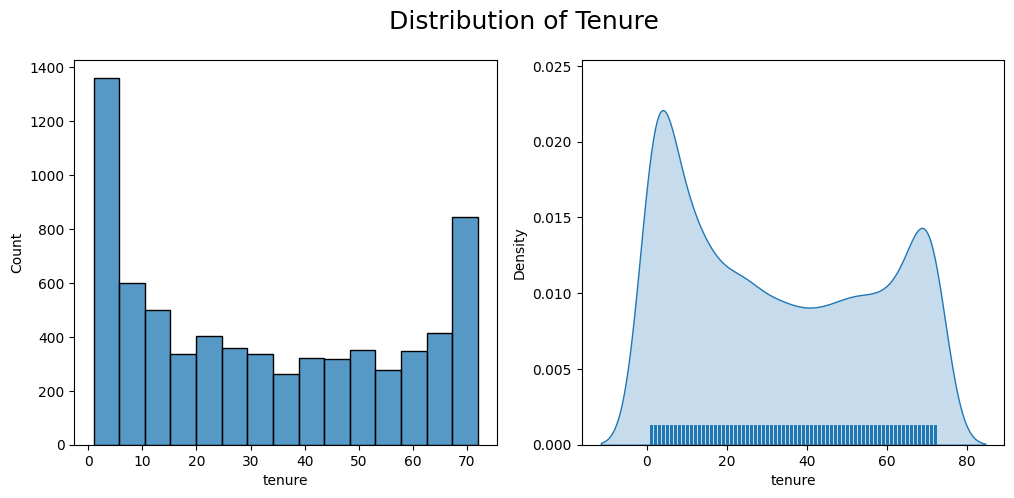

In [15]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data["tenure"],ax=ax[0])
sns.kdeplot(data["tenure"],fill=True,ax=ax[1])
sns.rugplot(data["tenure"],height=0.05)

fig.suptitle("Distribution of Tenure",size=18);

Text(0.5, 0.98, 'Distribution of TotalCharges')

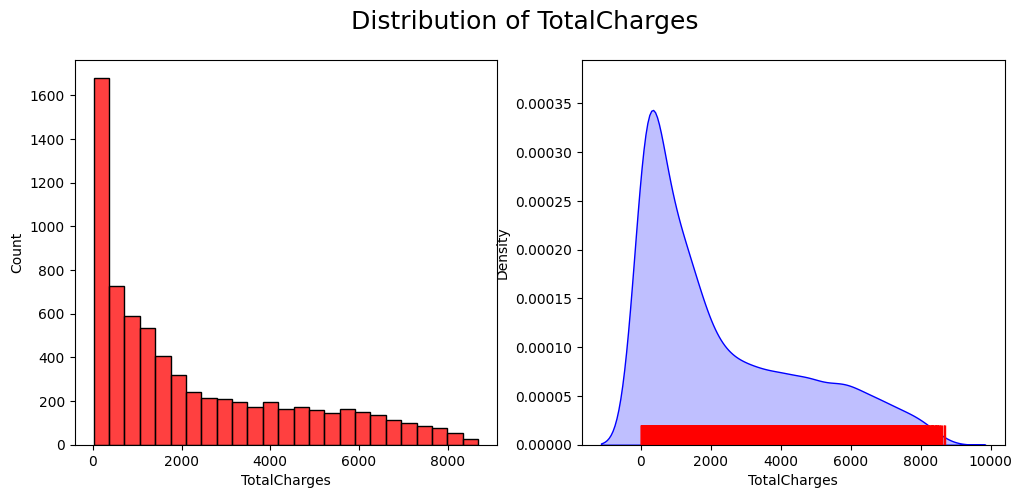

In [16]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data["TotalCharges"],ax=ax[0],color='Red')
sns.kdeplot(data["TotalCharges"],fill=True,ax=ax[1],color='Blue')
sns.rugplot(data["TotalCharges"],height=0.05,color='Red')

fig.suptitle("Distribution of TotalCharges",size=18)


Text(0.5, 0.98, 'Distribution of MonthlyCharges')

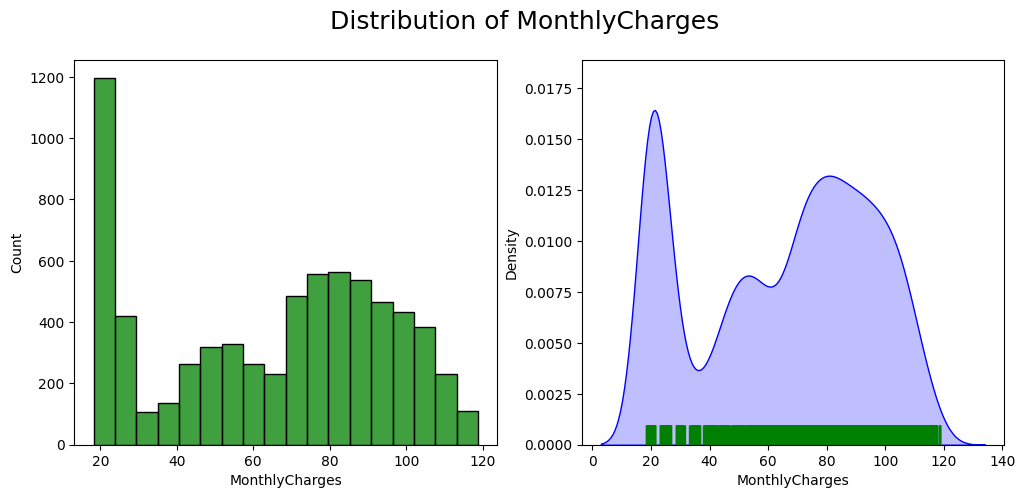

In [17]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data["MonthlyCharges"],ax=ax[0],color='Green')
sns.kdeplot(data["MonthlyCharges"],fill=True,ax=ax[1],color='Blue')
sns.rugplot(data["MonthlyCharges"],height=0.05,color='Green')

fig.suptitle("Distribution of MonthlyCharges",size=18)
